### Stock Market Prediction And Forecasting Using Stacked LSTM

In [2]:
import pandas as pd

In [20]:
df= pd.read_excel(r"C:\Users\ansh\Desktop\Nifty 50 Historical Data.xlsx")
df = df.sort_values('Date')

In [21]:
df.head()

,Date,Price,Open,High,Low,Volume,Chg%
6898,1995-11-06,988.92,1001.53,1001.53,988.92,0,-0.0111
6897,1995-11-07,978.22,987.17,987.17,977.05,0,-0.0108
6896,1995-11-08,964.01,976.28,976.28,962.98,0,-0.0145
6895,1995-11-09,953.07,960.32,960.32,952.13,0,-0.0113
6894,1995-11-10,948.82,951.93,951.93,946.00,0,-0.0045


In [22]:
df.tail()

,Date,Price,Open,High,Low,Volume,Chg%
4,2023-07-21,19745.00,19800.45,19887.40,19700.00,312.46B,-0.0117
3,2023-07-24,19672.35,19748.45,19782.75,19658.30,265.56B,-0.0037
2,2023-07-25,19680.60,19729.35,19729.35,19615.95,369.65B,0.0004
1,2023-07-26,19778.30,19733.35,19825.60,19716.70,244.75B,0.0050
0,2023-07-27,19699.00,19850.40,19867.15,19604.25,334.68K,-0.0040


In [23]:
df1=df.reset_index()['Price']

In [24]:
df1

0         988.92
1         978.22
2         964.01
3         953.07
4         948.82
          ...   
6894    19745.00
6895    19672.35
6896    19680.60
6897    19778.30
6898    19699.00
Name: Price, Length: 6899, dtype: float64

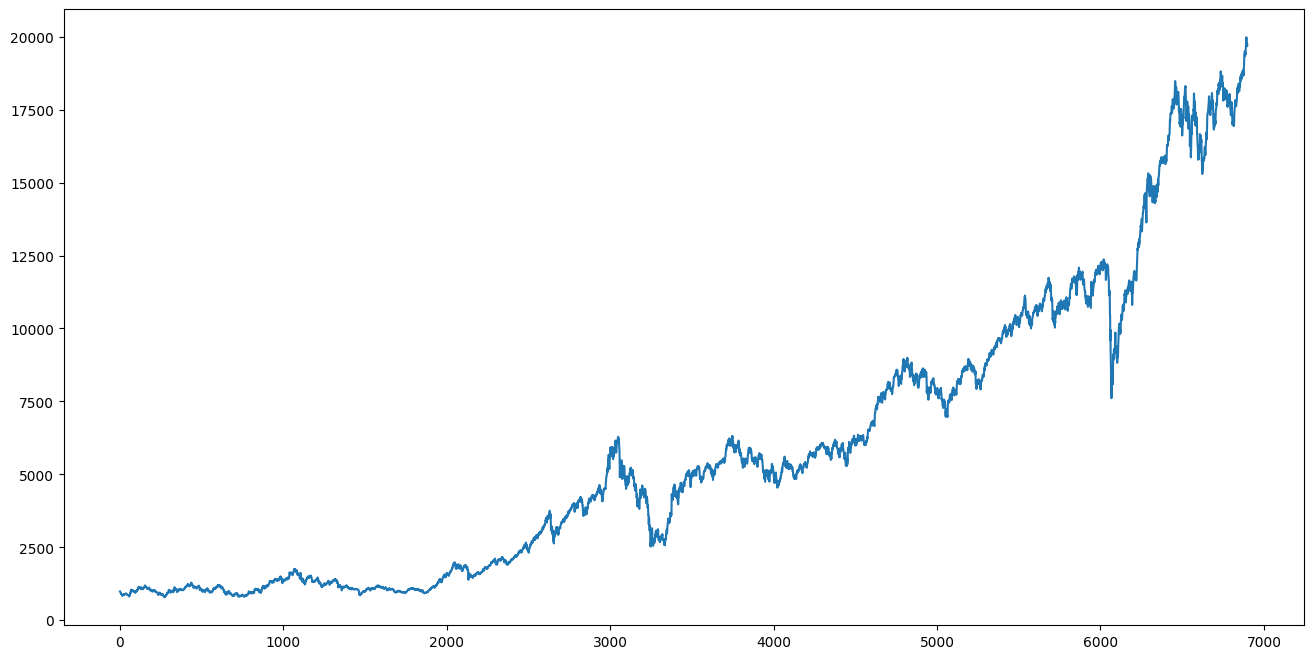

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16, 8))
plt.plot(df1)

In [32]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [33]:
import numpy as np

In [34]:
df1

0         988.92
1         978.22
2         964.01
3         953.07
4         948.82
          ...   
6894    19745.00
6895    19672.35
6896    19680.60
6897    19778.30
6898    19699.00
Name: Price, Length: 6899, dtype: float64

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [36]:
print(df1)

[[0.01046167]
 [0.00990412]
 [0.00916367]
 ...
 [0.98444323]
 [0.98953416]
 [0.98540201]]


In [83]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [84]:
training_size,test_size

(5174, 1725)

In [85]:
train_data

array([[0.01046167],
       [0.00990412],
       [0.00916367],
       ...,
       [0.41139076],
       [0.41286019],
       [0.41113543]])

In [86]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [87]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 1000
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [88]:
print(X_train.shape), print(y_train.shape)

(4173, 1000)
(4173,)


(None, None)

In [89]:
print(X_test.shape), print(ytest.shape)

(724, 1000)
(724,)


(None, None)

In [90]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [91]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [96]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(1000,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [97]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1000, 50)          10400     
                                                                 
 lstm_7 (LSTM)               (None, 1000, 50)          20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [98]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1000, 50)          10400     
                                                                 
 lstm_7 (LSTM)               (None, 1000, 50)          20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [100]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=4,batch_size=64,verbose=1)

Epoch 1/15
66/66 [==============================] - 71s 1s/step - loss: 8.8555e-05 - val_loss: 0.0033
Epoch 2/15
66/66 [==============================] - 74s 1s/step - loss: 8.7373e-05 - val_loss: 0.0029
Epoch 3/15
66/66 [==============================] - 77s 1s/step - loss: 8.2443e-05 - val_loss: 0.0027
Epoch 4/15
66/66 [==============================] - 76s 1s/step - loss: 8.0326e-05 - val_loss: 0.0019
Epoch 5/15
66/66 [==============================] - 82s 1s/step - loss: 8.0320e-05 - val_loss: 0.0028
Epoch 6/15
66/66 [==============================] - 79s 1s/step - loss: 7.6258e-05 - val_loss: 0.0014
Epoch 7/15
66/66 [==============================] - 80s 1s/step - loss: 7.5705e-05 - val_loss: 0.0022
Epoch 8/15
66/66 [==============================] - 78s 1s/step - loss: 7.0184e-05 - val_loss: 0.0025
Epoch 9/15
66/66 [==============================] - 76s 1s/step - loss: 7.1918e-05 - val_loss: 0.0018
Epoch 10/15
66/66 [==============================] - 75s 1s/step - loss: 6.9077e-0

In [101]:
import tensorflow as tf

In [102]:
tf.__version__

'2.14.0'

In [103]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 [==============================] - 4s 185ms/step


In [104]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [105]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

4572.097748560312

In [106]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

15619.108898990733

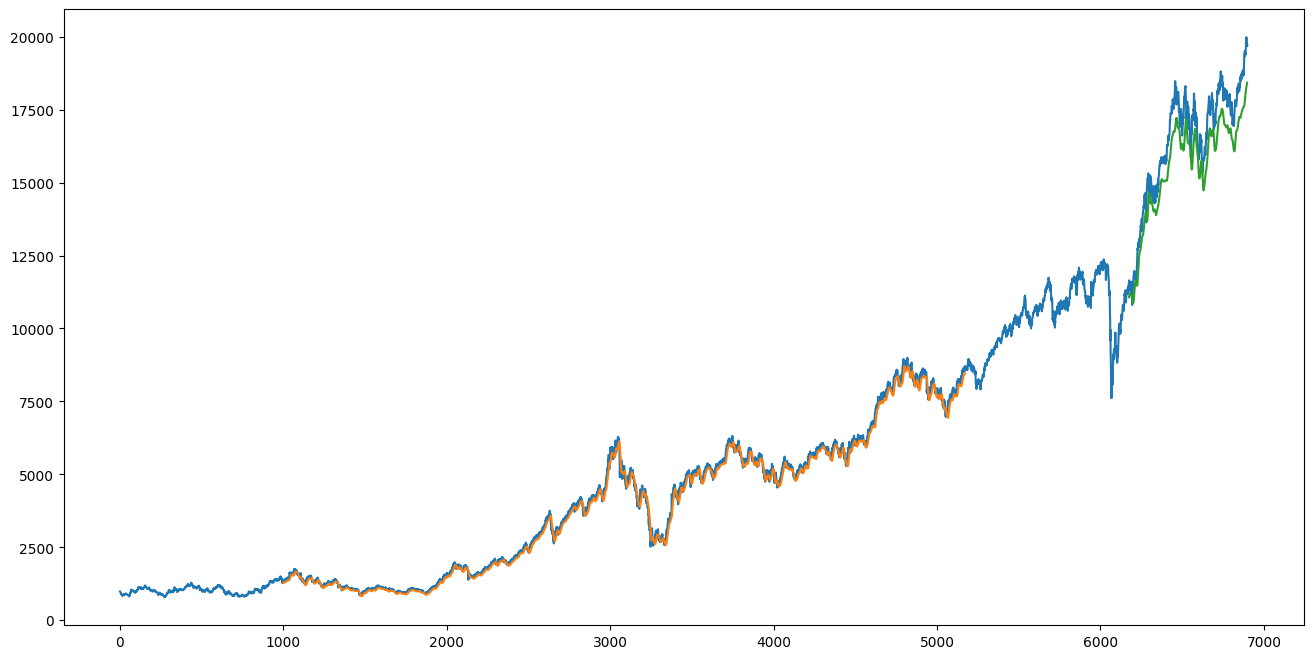

In [108]:
### Plotting 
# shift train predictions for plotting
look_back=1000
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize = (16, 8))
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [109]:
len(test_data)

1725

In [113]:
x_input=test_data[725:].reshape(1,-1)
x_input.shape


(1, 1000)

In [114]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [115]:
temp_input

[0.5679407013704341,
 0.5632197384190506,
 0.5539627950601844,
 0.5501563232765359,
 0.5493668907300296,
 0.5462534521390234,
 0.5452555885571361,
 0.5469308530040122,
 0.541975405137825,
 0.5365666197696837,
 0.5382653327080402,
 0.53107446198739,
 0.5319785316033557,
 0.5249570110989527,
 0.5294200406440519,
 0.524587046011151,
 0.5338075139388255,
 0.537830232921682,
 0.5282528268459173,
 0.5336485852743473,
 0.5346073680371006,
 0.5349252253660569,
 0.5330024490646657,
 0.5278802563701736,
 0.5186389453389609,
 0.5232244281173467,
 0.5351310510134959,
 0.5376061695586473,
 0.5345187848470637,
 0.5294226460319941,
 0.5333281225574488,
 0.5215856391016622,
 0.5240216768276796,
 0.5241910270439268,
 0.529313219738419,
 0.5322755458287738,
 0.5339768641550727,
 0.5312203637121566,
 0.5360715960606534,
 0.5322989943202543,
 0.5226121619509145,
 0.5238132457922984,
 0.5167344067531655,
 0.5464045646396749,
 0.5633916940232401,
 0.5627664009170965,
 0.5550544526079934,
 0.5618805690167266

In [116]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=1000
i=0
while(i<60):
    
    if(len(temp_input)>1000):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.92028034]
1001
1 day input [0.56321974 0.5539628  0.55015632 0.54936689 0.54625345 0.54525559
 0.54693085 0.54197541 0.53656662 0.53826533 0.53107446 0.53197853
 0.52495701 0.52942004 0.52458705 0.53380751 0.53783023 0.52825283
 0.53364859 0.53460737 0.53492523 0.53300245 0.52788026 0.51863895
 0.52322443 0.53513105 0.53760617 0.53451878 0.52942265 0.53332812
 0.52158564 0.52402168 0.52419103 0.52931322 0.53227555 0.53397686
 0.53122036 0.5360716  0.53229899 0.52261216 0.52381325 0.51673441
 0.54640456 0.56339169 0.5627664  0.55505445 0.56188057 0.55881663
 0.55683914 0.5508702  0.54847845 0.54122245 0.53870304 0.54844198
 0.54433849 0.54801209 0.54989318 0.55443437 0.55629462 0.56267
 0.56660414 0.56277422 0.56359491 0.5624746  0.56254234 0.564796
 0.57311761 0.57610078 0.57783857 0.57852379 0.58116565 0.57990985
 0.58245532 0.58485227 0.57943828 0.57971445 0.57591058 0.57755979
 0.57877651 0.57820593 0.58110312 0.58417748 0.58257777 0.57976395
 0.58806732 0.58618884 0.58947163 0.5

28 day output [[0.903272]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94413203
 0.93795931 0.92865342 0.91987926 0.91280973 0.90777564 0.90473258
 0.90339231 0.90332204 0.90403908 0.90509242 0.90611798 0.90686554
 0.90720606 0.90711629

In [136]:
day_new=np.arange(1,1001)
day_pred=np.arange(1001,1061)

In [137]:
import matplotlib.pyplot as plt

In [138]:
len(df1)

6899

In [139]:
day_new = day_new.reshape(-1, 1)
day_new.shape

(1000, 1)

In [140]:
day_pred = day_pred.reshape(-1, 1)
day_pred.shape

(60, 1)

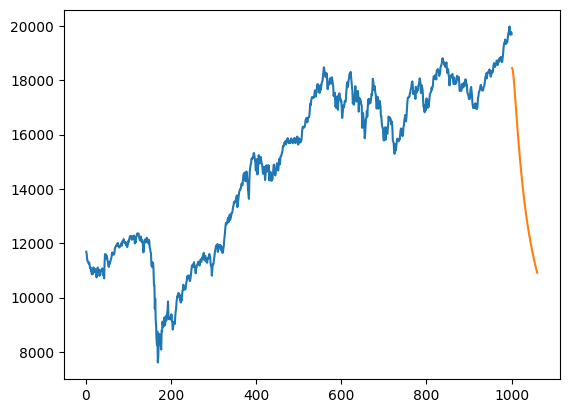

In [141]:
plt.plot(day_new,scaler.inverse_transform(df1[5899:]).reshape(-1, 1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

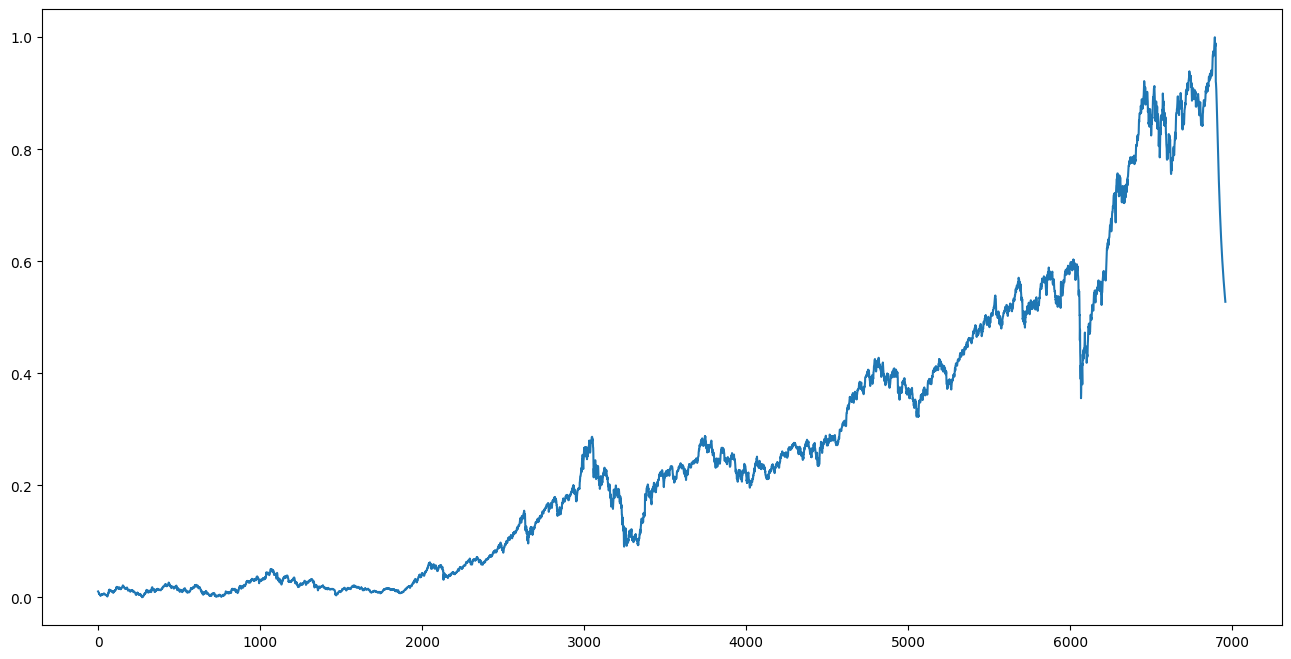

In [142]:
df3=df1.tolist()
df3.extend(lst_output)
plt.figure(figsize = (16, 8))
plt.plot(df3[0:])

In [143]:
df3=scaler.inverse_transform(df3).tolist()

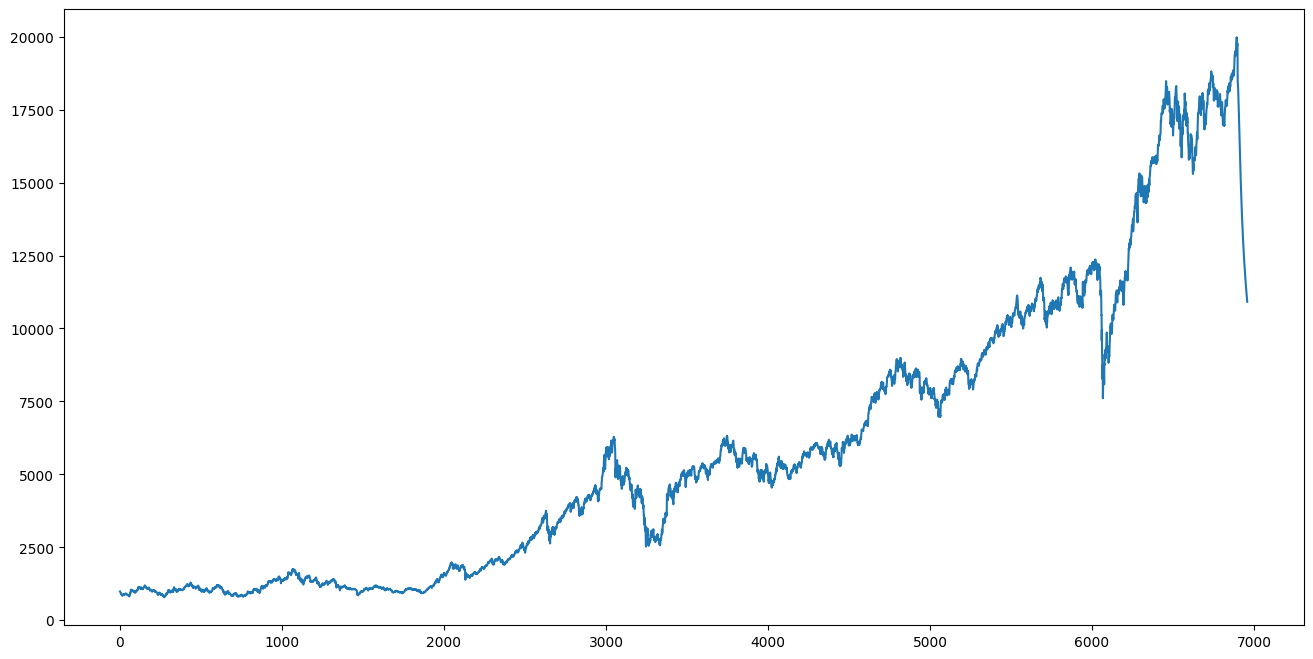

In [144]:
plt.figure(figsize = (16, 8))
plt.plot(df3)